In [1]:
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import nltk
nltk.download('stopwords')
from ast import literal_eval
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('C:\mpst_full_data.csv')
data.columns

Index(['imdb_id', 'title', 'plot_synopsis', 'tags', 'split',
       'synopsis_source'],
      dtype='object')

In [3]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))

In [5]:
tag_dtm = vectorizer.fit_transform(data['tags'])
tag_dtm

<14828x142 sparse matrix of type '<class 'numpy.int64'>'
	with 44206 stored elements in Compressed Sparse Row format>

In [6]:
print("Number of data points: ", tag_dtm.shape[0])#of entries
print("Number of unique tags: ", tag_dtm.shape[1]) #of total labels

Number of data points:  14828
Number of unique tags:  142


In [7]:
#some of the tags are:

tags = vectorizer.get_feature_names()
print("Some of the tags we have :" , tags[1:5])

Some of the tags we have : [' action', ' adult comedy', ' allegory', ' alternate history']


In [ ]:
### Number of times a tag appeared

In [8]:
#Lets now store the document term matrix in dictionary

freqs = tag_dtm.sum(axis=0).A1
print(freqs)

[ 178  601  110   82   79  160   49  381   26  139   59  113  375   58
   11   81   78  627   88  328 1614  145  165  149  245  638  314   71
 2571  401  332   47  129  219  113  135  408  729  361   64  122   50
  292 4344  300  556    3  180  194  164    8  191 1120  189   70  145
 1306 1474  629  659  247  220  326  179   35  686   84  252 2815   14
   51   92   63   18   57   23   45   69   15   18   81   15   98  150
   49   31    3    9 1232   26  114 1033   52  240   56  167  111  250
    5  366  474  109   19   22   53   30   18   78   93  275   54   46
    4  165 1438  219  189   34  366   34   41  155   64  777  100   28
   59 1162 1432   23  157   62   13   38   11   19  400   36  345 1611
   59   28]


In [9]:
count_tags = dict(zip(tags, freqs))
print(count_tags)

{' absurd': 178, ' action': 601, ' adult comedy': 110, ' allegory': 82, ' alternate history': 79, ' alternate reality': 160, ' anti war': 49, ' atmospheric': 381, ' autobiographical': 26, ' avant garde': 139, ' blaxploitation': 59, ' bleak': 113, ' boring': 375, ' brainwashing': 58, ' christian film': 11, ' claustrophobic': 81, ' clever': 78, ' comedy': 627, ' comic': 88, ' cruelty': 328, ' cult': 1614, ' cute': 145, ' dark': 165, ' depressing': 149, ' dramatic': 245, ' entertaining': 638, ' fantasy': 314, ' feel-good': 71, ' flashback': 2571, ' good versus evil': 401, ' gothic': 332, ' grindhouse film': 47, ' haunting': 129, ' historical': 219, ' historical fiction': 113, ' home movie': 135, ' horror': 408, ' humor': 729, ' insanity': 361, ' inspiring': 64, ' intrigue': 122, ' magical realism': 50, ' melodrama': 292, ' murder': 4344, ' mystery': 300, ' neo noir': 556, ' non fiction': 3, ' paranormal': 180, ' philosophical': 194, ' plot twist': 164, ' pornographic': 8, ' prank': 191, '

In [10]:
#saving it to a CSV files. 

if not os.path.isfile('tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key,value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,absurd,178
1,action,601
2,adult comedy,110
3,allegory,82
4,alternate history,79


In [11]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

print(tag_df_sorted)
print(tag_counts)

                Tags  Counts
43            murder    4344
68          violence    2815
28         flashback    2571
20              cult    1614
139         violence    1611
..               ...     ...
50      pornographic       8
98         feel-good       5
112  magical realism       4
46       non fiction       3
86    claustrophobic       3

[142 rows x 2 columns]
[4344 2815 2571 1614 1611 1474 1438 1432 1306 1232 1162 1120 1033  777
  729  686  659  638  629  627  601  556  474  408  401  400  381  375
  366  366  361  345  332  328  326  314  300  292  275  252  250  247
  245  240  220  219  219  194  191  189  189  180  179  178  167  165
  165  164  160  157  155  150  149  145  145  139  135  129  122  114
  113  113  111  110  109  100   98   93   92   88   84   82   81   81
   79   78   78   71   70   69   64   64   63   62   59   59   59   58
   57   56   54   53   52   51   50   49   49   47   46   45   41   38
   36   35   34   34   31   30   28   28   26   26   23   23

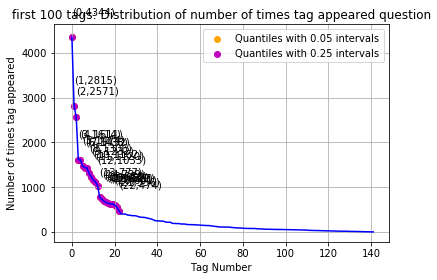

In [12]:
plt.plot(tag_counts, c='b')
plt.scatter(x=list(range(0,23)), y=tag_counts[0:23:], c='orange', label='Quantiles with 0.05 intervals')
plt.scatter(x=list(range(0,23)), y = tag_counts[0:23:], c='m', label = 'Quantiles with 0.25 intervals')

for x,y in zip(list(range(0,23)), tag_counts[0:23]):
    plt.annotate(s="({},{})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
    

plt.title('first 100 tags: Distribution of number of times tag appeared question')
plt.grid()
plt.xlabel("Tag Number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()

In [13]:
###Top 20 tags

<Figure size 1440x720 with 0 Axes>

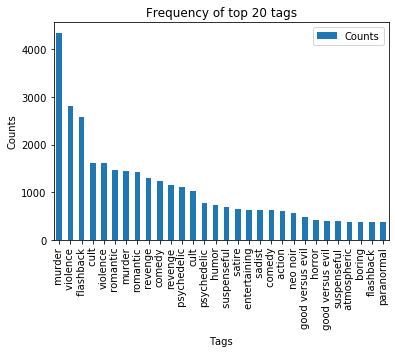

In [14]:
i= np.arange(30)
fig = plt.figure(figsize=(20,10))
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i,tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

In [15]:
### Data preprocessing

#1. removing HTML tags, punctuation, special characters
#2. remove alhpa numeric and covert to lowercase

In [16]:
def cleanHTML(sentence):
    cleanr=re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

In [17]:
# remove all punctuation
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,)|(|\|/)]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [18]:
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+',' ',word)
        alpha_sent+= alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [19]:
data['plot_synopsis'] = data['plot_synopsis'].str.lower()
data['plot_synopsis'] = data['plot_synopsis'].apply(cleanHTML)
data['plot_synopsis'] = data['plot_synopsis'].apply(cleanPunc)
data['plot_synopsis'] = data['plot_synopsis'].apply(keepAlpha)

In [20]:
print(data['plot_synopsis'][1]) #print a particular synopsis

two thousand years ago nhagruul the foul a sorcerer who reveled in corrupting the innocent and the spread of despair neared the end of his mortal days and was dismayed consumed by hatred for the living nhagruul sold his soul to the demon lords of the abyss so that his malign spirit would survive in an excruciating ritual nhagrulls skin was flayed into pages his bones hammered into a cover and his diseased blood became the ink to pen a book most vile creatures vile and depraved rose from every pit and unclean barrow to partake in the fever of destruction the kingdoms of karkoth were consumed by this plague of evil until an order of holy warriors arose from the ashes the knights of the new sun swore an oath to resurrect hope in the land the purity of their hearts was so great that pelor the god of light gave the knights powerful amulets with which to channel his power transcendent with divine might the knights of the new sun pierced the shadow that had darkened the land for twelve hundre

In [21]:
#3. remove stopwords present in text using default set of stop-words from NLTK library

In [23]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero', 'one' , 'two' , 'three', 'four' , 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'may', 'also'
                  'across' , 'among', 'beside', 'however', 'yet', 'within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words)+ ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['plot_synopsis'] = data['plot_synopsis'].apply(removeStopWords)
print(data['plot_synopsis'][1])

 thousand years ago nhagruul  foul  sorcerer  reveled  corrupting  innocent   spread  despair neared  end   mortal days   dismayed consumed  hatred   living nhagruul sold  soul   demon lords   abyss    malign spirit would survive   excruciating ritual nhagrulls skin  flayed  pages  bones hammered   cover   diseased blood became  ink  pen  book  vile creatures vile  depraved rose  every pit  unclean barrow  partake   fever  destruction  kingdoms  karkoth  consumed   plague  evil   order  holy warriors arose   ashes  knights   new sun swore  oath  resurrect hope   land  purity   hearts   great  pelor  god  light gave  knights powerful amulets    channel  power transcendent  divine might  knights   new sun pierced  shadow   darkened  land  twelve hundred years  cast  asunder     awed   glory  disciples  nhagruul disassembled  book  bribed  greedy souls  hide  pieces   could  retrieved  ink  discovered  destroyed  despite years  searching  cover  pages  never found peace ruled  land  centu

In [24]:
#4. Stemming - using SnowBallStemmer

In [25]:
stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence+= stem
        stemSentence+= " "
    #print(stemSentence)
    stemSentence = stemSentence.strip()
    return stemSentence


In [26]:
data['preprocessed_data'] = data['plot_synopsis'].apply(stemming)
print(data['plot_synopsis'][1])

 thousand years ago nhagruul  foul  sorcerer  reveled  corrupting  innocent   spread  despair neared  end   mortal days   dismayed consumed  hatred   living nhagruul sold  soul   demon lords   abyss    malign spirit would survive   excruciating ritual nhagrulls skin  flayed  pages  bones hammered   cover   diseased blood became  ink  pen  book  vile creatures vile  depraved rose  every pit  unclean barrow  partake   fever  destruction  kingdoms  karkoth  consumed   plague  evil   order  holy warriors arose   ashes  knights   new sun swore  oath  resurrect hope   land  purity   hearts   great  pelor  god  light gave  knights powerful amulets    channel  power transcendent  divine might  knights   new sun pierced  shadow   darkened  land  twelve hundred years  cast  asunder     awed   glory  disciples  nhagruul disassembled  book  bribed  greedy souls  hide  pieces   could  retrieved  ink  discovered  destroyed  despite years  searching  cover  pages  never found peace ruled  land  centu

In [27]:
###Splitting the data into test and training data

In [29]:
x = data['preprocessed_data']
y = data['tags']

from sklearn.model_selection import train_test_split

In [30]:
#random_state = number of unique genres
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2, random_state=42)

In [31]:
print(y_test)

2609                             inspiring, comedy, boring
4045     comedy, murder, violence, flashback, good vers...
6128                         good versus evil, psychedelic
12682                     paranormal, satire, storytelling
7847                                      violence, murder
                               ...                        
9932                            mystery, murder, flashback
13793                                          non fiction
6932                                      romantic, satire
36       psychedelic, comedy, murder, storytelling, fla...
13038                                               murder
Name: tags, Length: 2966, dtype: object


In [32]:
## analysing tags

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 10, max_features = 20000, smooth_idf = True,  strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(x_train)
x_train_13char = vectorizer.transform(x_train)
x_test_13char = vectorizer.transform(x_test)


In [33]:
#building the model 

from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# f1_score import 
from sklearn.metrics import f1_score

In [34]:
##We will use sk-learn’s OneVsRestClassifier class to solve this problem as a Binary Relevance or one-vs-all problem:

In [35]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [36]:
##Finally, fit the model on the train set:

In [ ]:
# fit model on train data
clf.fit(x_train_13char, y_train)

In [ ]:
# make predictions for validation set
y_pred = clf.predict(x_test_13char)

In [ ]:
print(data['title'][1])
print(data['tags'][1])

print(y_pred[1])

In [ ]:
# evaluate performance
f1_score(y_test, y_pred, average="micro")

In [ ]:
# f1_score import 
from sklearn.metrics import precision_score
print('The Macro precision score  is: ' , precision_score(y_test, y_pred,average='macro'))
print('The Micro precision score  is: ' , precision_score(y_test, y_pred,average='micro'))
print('The Weighted precision score  is: ' , precision_score(y_test, y_pred,average='weighted'))